<a href="https://colab.research.google.com/github/Valentinasierra98/Proyecto_AL/blob/main/Proyecto_Giraldo_Sierra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL
## Curso: Aprendizaje Automático  
### Maestría en Inteligencia Artificial y Ciencia de Datos  

---

## Elaborado por:  
- **Jahir Alberto Giraldo (22500239)**  
- **Valentina Sierra Caña (22500212)**  

---

El presente proyecto tiene como objetivo aplicar técnicas de aprendizaje automático supervisado para resolver un problema de clasificación binaria utilizando el Bank Marketing Dataset. Este conjunto de datos contiene información de campañas de marketing telefónico realizadas por una entidad bancaria, y busca predecir si un cliente aceptará o no una oferta de depósito a plazo.

Se realizará un análisis exploratorio del dataset, seguido de la selección de variables y la partición en conjuntos de entrenamiento, validación y prueba. Se implementarán y compararán modelos de clasificación como Regresión Logística, SVM, Árboles de Decisión y KNN, evaluando su rendimiento con métricas estándar y una adicional.

#Carga de Archivos

In [ ]:
from google.colab import files
files.upload()  # Subimos nuestro archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"valentinasierracaa","key":"df26ca3be49ca4a101a8cd8cc1998b40"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d janiobachmann/bank-marketing-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
License(s): CC0-1.0
  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 192MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('bank.csv')
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Tenemos 7 variables númericas y 10 categoricas

In [ ]:
# Verificar duplicados
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicados: 0


No hay valores nulos en ninguna columna

In [ ]:
from pandas.api.types import is_numeric_dtype, is_string_dtype
# Dividir entre variables numéricas y categóricas para facilitar los análisis descriptivos y exploratorios de la Data
num_cols = [col for col in df.columns if is_numeric_dtype(df[col])]
cat_cols = [col for col in df.columns if is_string_dtype(df[col])]

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


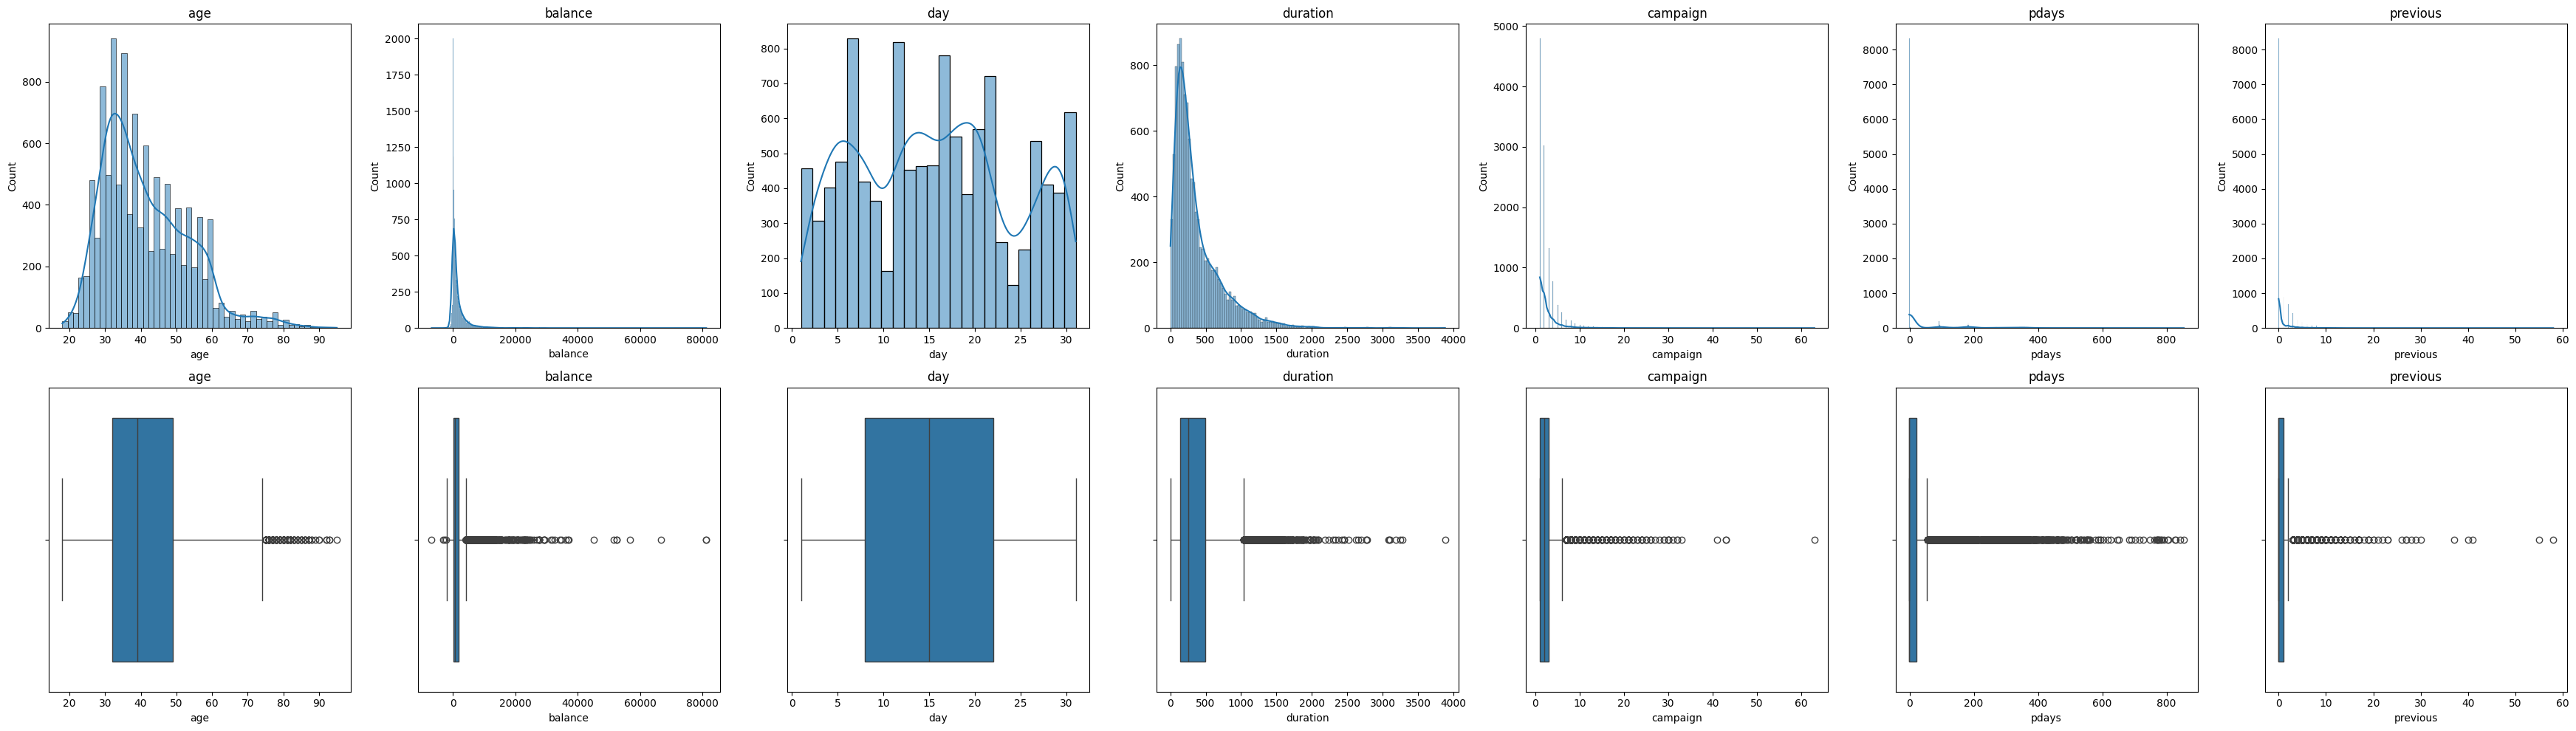

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma y boxplot para variables numéricas
if num_cols:
    fig, ax = plt.subplots(2, len(num_cols), figsize=(5 * len(num_cols), 10))
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=ax[0, i]); ax[0, i].set_title(col)
        sns.boxplot(x=df[col], ax=ax[1, i]); ax[1, i].set_title(col)
    plt.tight_layout()
    plt.show()

La variable age presenta una distribución asimétrica a la derecha, con mayor concentración entre los 30 y 40 años, y pocos valores extremos en edades avanzadas. balance muestra una fuerte asimetría positiva con numerosos outliers, lo que sugiere la presencia de clientes con saldos bancarios atípicamente altos. Las variables duration, campaign, pdays y previous también evidencian distribuciones sesgadas a la derecha con una gran cantidad de valores bajos y pocos valores altos, generando colas largas y múltiples outliers. day se distribuye de forma más uniforme pero con algunas oscilaciones, posiblemente relacionadas con días de mayor actividad.

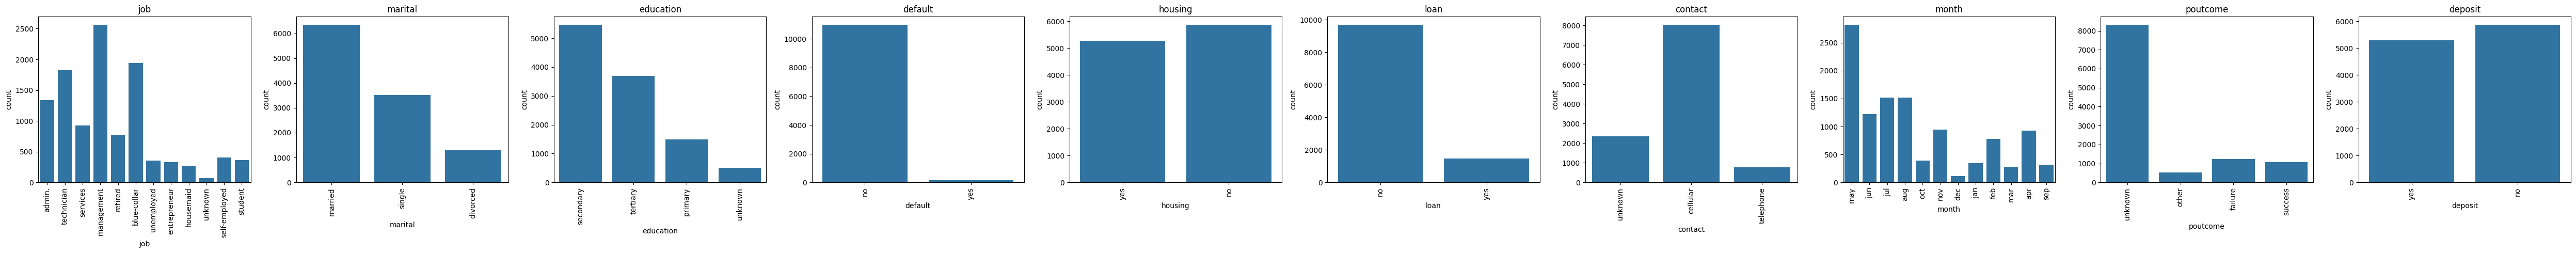

In [ ]:
# Conteo de categorías para variables categóricas
if cat_cols:
    fig, ax = plt.subplots(1, len(cat_cols), figsize=(5 * len(cat_cols), 5))
    if len(cat_cols) == 1: ax = [ax]
    for i, col in enumerate(cat_cols):
        sns.countplot(x=df[col], ax=ax[i]); ax[i].set_title(col)
        ax[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

En el análisis de las variables categóricas se observa que los trabajos más frecuentes son blue-collar, management y technician. La mayoría de los clientes están casados y tienen educación secundaria o terciaria. Casi ninguno presenta historial de impago (default), y aunque muchos tienen préstamos hipotecarios, pocos tienen préstamos personales. La mayoría de los contactos se realizaron vía celular y se concentraron en el mes de mayo, lo que puede reflejar una campaña específica. En cuanto al resultado de campañas anteriores (poutcome), predomina el valor unknown, lo que limita su análisis. Finalmente, la variable objetivo (deposit) está balanceada, lo cual es favorable para análisis predictivos.

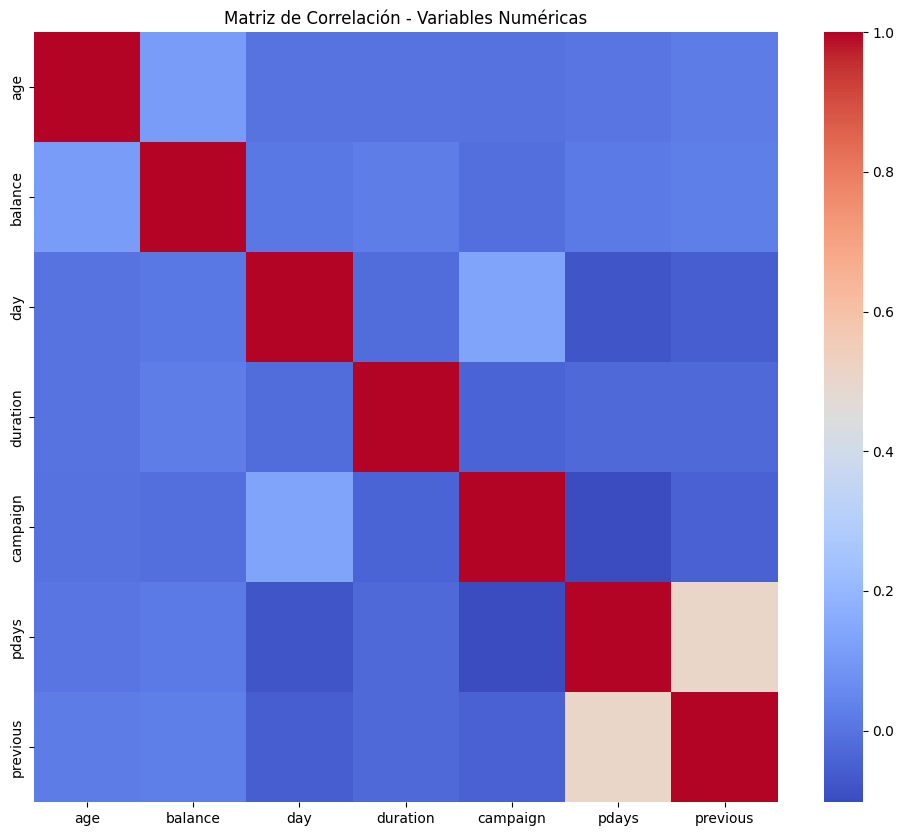

In [ ]:
# Calcular la matriz de correlación solo para las numéricas
corr_num = df[num_cols].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr_num, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

Esta matriz muestra que las variables numéricas del conjunto de datos presentan, en general, bajas correlaciones lineales entre sí, lo cual sugiere que no existe multicolinealidad significativa. La única correlación moderada destacable se observa entre pdays y previous, lo cual es coherente, ya que ambas variables reflejan aspectos relacionados con contactos previos a los clientes.

In [ ]:
# One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

La siguente matriz muestra la correlación de Pearson entre todas las variables numéricas del DataFrame, incluyendo las variables categóricas que fueron convertidas en binarias (0 y 1) mediante one-hot encoding.

Valores cercanos a 1 (rojo oscuro): fuerte correlación positiva.

Valores cercanos a -1 (azul oscuro): fuerte correlación negativa.

Valores cercanos a 0 (color claro): poca o ninguna correlación.

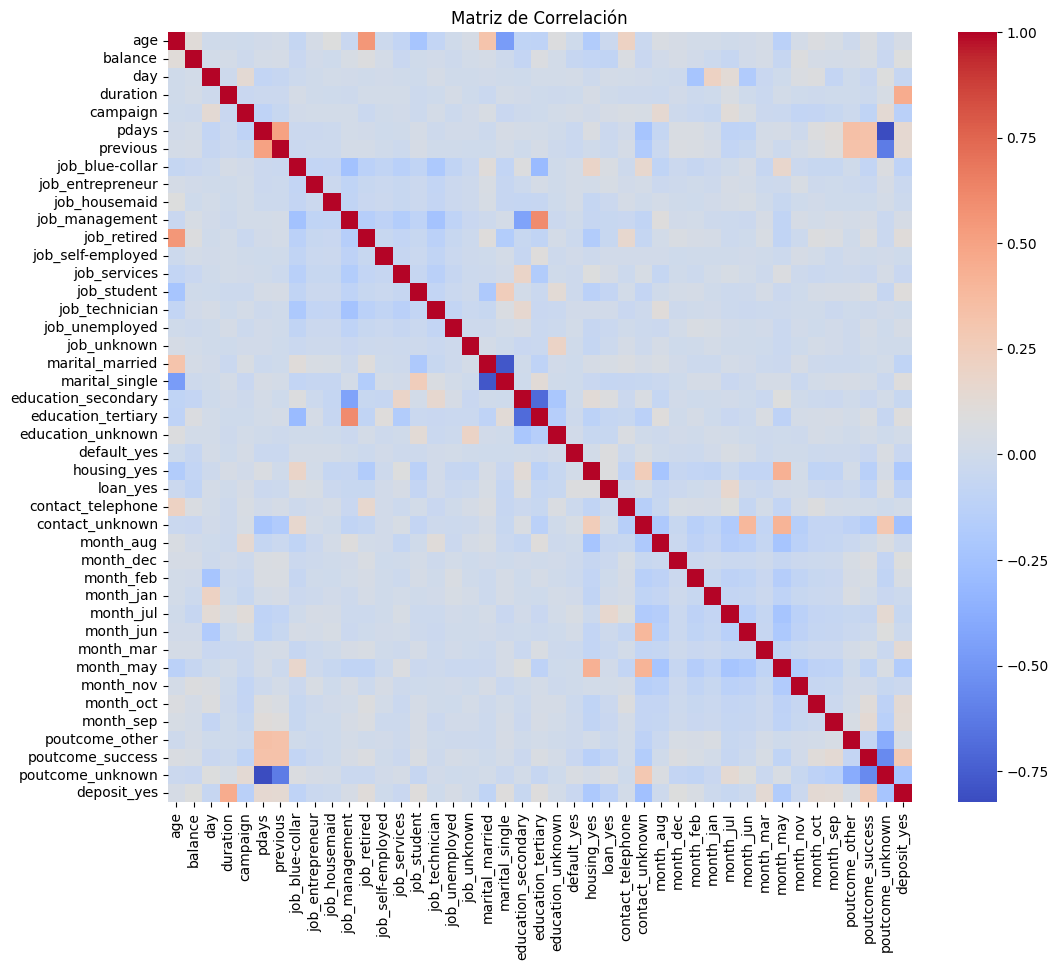

In [ ]:
# Correlación para variables numéricas y one-hot
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación")
plt.show()

 En este gráfico podemos evidenciar algunas correlaciones esperadas entre variables mutuamente excluyentes (como meses o categorías laborales), aunque no se observan patrones de colinealidad severa. Destaca la correlación positiva entre poutcome_success y deposit_yes, lo cual indica que un contacto previo exitoso incrementa la probabilidad de aceptación del depósito, lo que puede ser relevante en la modelación.

In [ ]:
import numpy as np

# Eliminar variables con alta colinealidad (> 0.8)
cor_matrix = df_encoded.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.8)]
df_encoded = df_encoded.drop(columns=to_drop)

print("Columnas eliminadas por colinealidad:", to_drop)

# Eliminar columnas con varianza cero
zero_var_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() <= 1]
df_encoded = df_encoded.drop(columns=zero_var_cols)
print("Columnas eliminadas por varianza cero:", zero_var_cols)

Columnas eliminadas por colinealidad: ['poutcome_unknown']
Columnas eliminadas por varianza cero: []


Se eliminó la variable poutcome_unknown debido a su alta colinealidad con otras variables del conjunto, lo cual puede generar redundancia e inestabilidad en los modelos predictivos.

# Análisis univariado sencillo para ver relación de las variables con nuestra variable de interes que es deposit

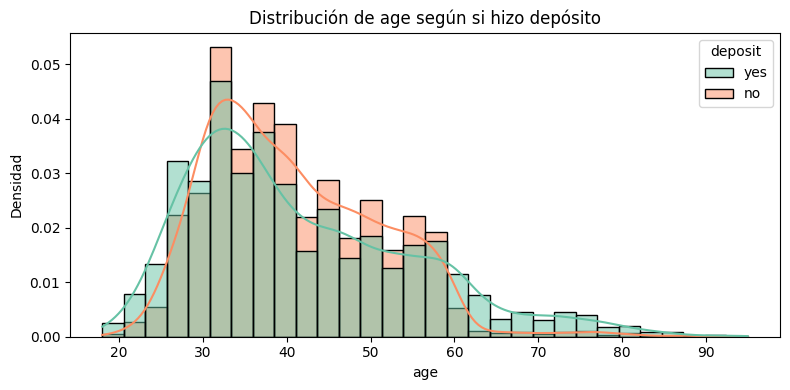

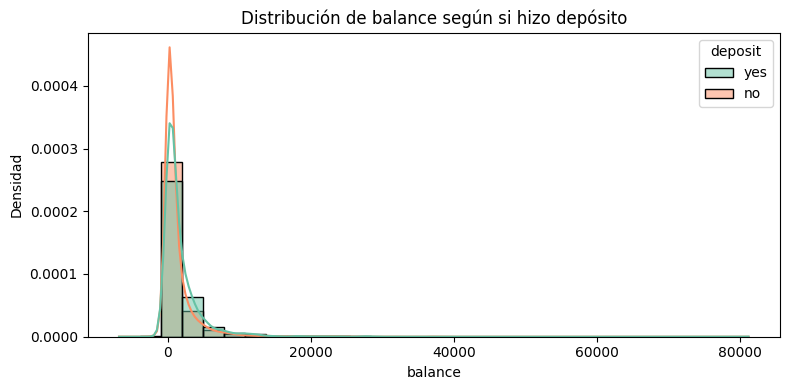

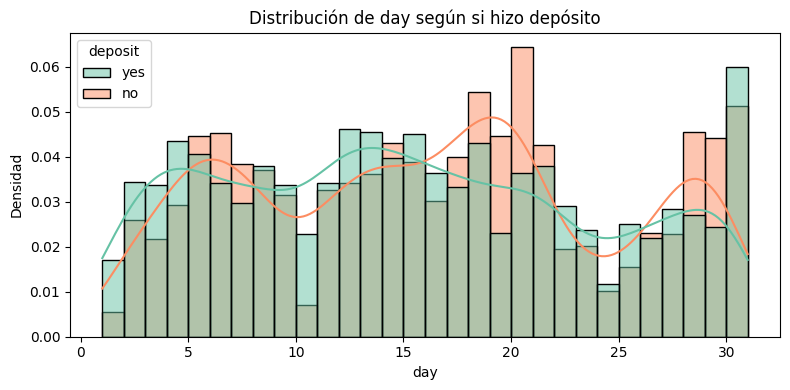

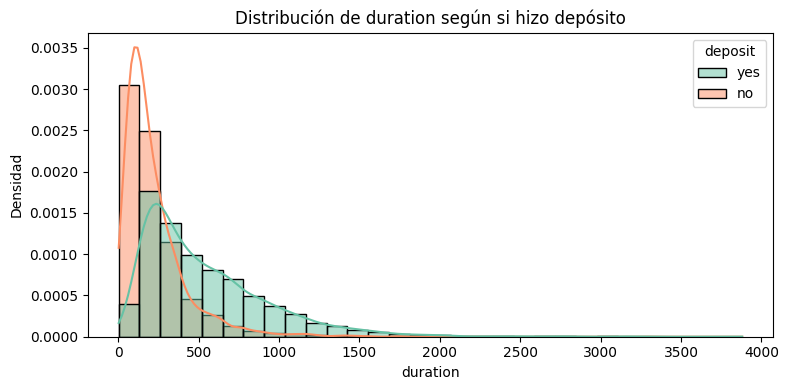

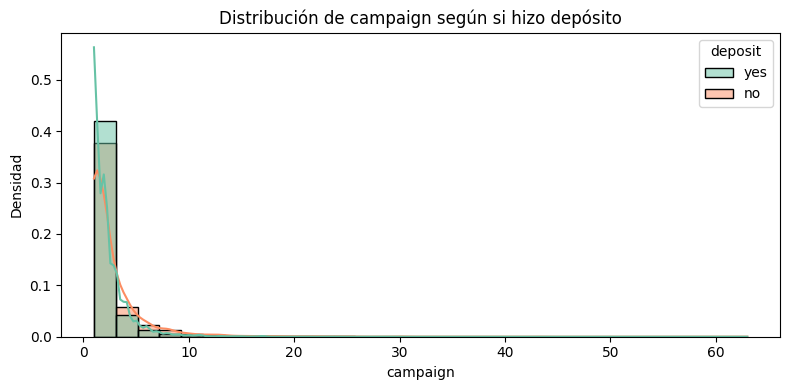

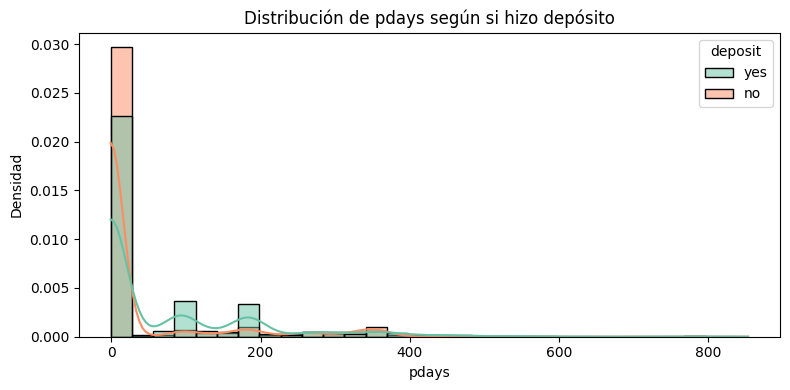

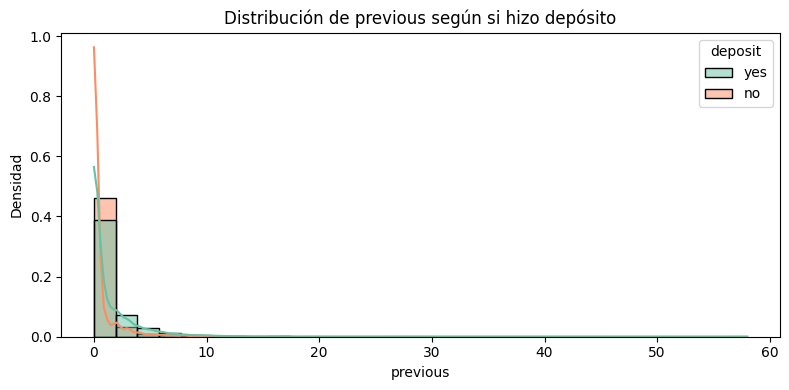

In [ ]:
# Asegúrate de tener las variables numéricas correctamente identificadas
from pandas.api.types import is_numeric_dtype
num_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

# Histograma con separación por clase 'deposit'
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='deposit', kde=True, stat='density', common_norm=False, palette='Set2', bins=30)
    plt.title(f'Distribución de {col} según si hizo depósito')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()


 La edad muestra que los clientes que aceptaron realizar un depósito tienden a concentrarse ligeramente más en rangos medios-altos (mayores de 30 años), mientras que los que no lo hicieron están más distribuidos hacia edades más jóvenes. En cuanto al balance, aunque la mayoría tiene saldos bajos o nulos, los que realizaron depósitos presentan una mayor dispersión hacia valores altos, lo que sugiere que un mayor saldo puede asociarse con una mayor probabilidad de depósito. Para la variable "day", no se observan patrones temporales fuertes, aunque hay cierta variabilidad que podría tener implicancias operativas. En la duración de la llamada ("duration"), la diferencia es notoria: quienes realizaron un depósito tuvieron llamadas mucho más largas, lo que indica una fuerte relación positiva entre la duración de la interacción y el éxito de la campaña. Las variables "campaign", "pdays" y "previous" están muy sesgadas hacia valores bajos, con distribuciones similares entre grupos, aunque se perciben ligeras diferencias que podrían refinarse mediante transformación o segmentación. En conjunto, las variables "duration" y "balance" parecen ser las más discriminantes para predecir la probabilidad de depósito.










In [ ]:
# Mostrar la cantidad de valores faltantes por columna
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


#Convertimos nuestra variable de interes en una variable Binaria

In [ ]:
y = df['deposit'].map({'no': 0, 'yes': 1})

In [ ]:
print(y.value_counts())  # Conteo

deposit
0    5873
1    5289
Name: count, dtype: int64


# División del dataset


* Train (entrenamiento): para ajustar los coeficientes del modelo.
* Validation (validación): para ajustar hiperparámetros (como regularización).
* Test (prueba): para evaluar el rendimiento final en datos no vistos.



In [ ]:
# Convertir la variable objetivo a binaria (0 y 1)
df_encoded['deposit_yes'] = df_encoded['deposit_yes'].astype(int)

# Variable objetivo binaria
y = df_encoded['deposit_yes']

# Variables predictoras: eliminamos la columna objetivo
X = df_encoded.drop('deposit_yes', axis=1)

# División del dataset: entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Tamaños
print(f'Tamaño entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño validación: {X_val.shape[0]} muestras')
print(f'Tamaño prueba: {X_test.shape[0]} muestras')
print(f'El DataFrame Inicial tiene {df.shape[0]} filas.')

Tamaño entrenamiento: 6696 muestras
Tamaño validación: 2233 muestras
Tamaño prueba: 2233 muestras
El DataFrame Inicial tiene 11162 filas.


Se separan las variables predictoras (X) de la variable respuesta (y) y se divide el conjunto de datos en tres subconjuntos: entrenamiento (60%), validación (20%) y prueba (20%). Esta estrategia permite entrenar modelos, ajustar hiperparámetros y evaluar el rendimiento final de manera justa y eficiente. El conjunto de entrenamiento se utiliza para ajustar los parámetros internos del modelo; el conjunto de validación sirve para optimizar hiperparámetros sin sobreajustar; y el conjunto de prueba se reserva como evaluación final. El uso de una división 60/20/20 representa un equilibrio adecuado entre capacidad de aprendizaje y robustez en la evaluación, según lo apoyan trabajos como The Elements of Statistical Learning de Hastie, Tibshirani y Friedman.

#Proceso de clasificación

Dado que nuestro dataset bancario contiene tanto variables categóricas como numéricas y tiene como objetivo una clasificación binaria para predecir la suscripción a un depósito a plazo, optamos por utilizar dos algoritmos complementarios: Regresión Logística y Árbol de Decisión. Elegimos la Regresión Logística porque es un modelo lineal robusto, eficiente para grandes volúmenes de datos y muy interpretable, lo que facilita entender la influencia de cada variable en la predicción. Por otro lado, seleccionamos el Árbol de Decisión debido a su capacidad para capturar relaciones no lineales y su flexibilidad para manejar variables categóricas sin necesidad de escalado o transformaciones complejas.

##Estandarización/Normalización de Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Escalado de características
scaler_type = "MinMax"

if scaler_type == "Standard":
    scaler = StandardScaler()
elif scaler_type == "MinMax":
    scaler = MinMaxScaler(feature_range=(-1, 1))
else:
    raise ValueError("El tipo de scaler especificado no es válido")

# Ajustar el scaler solo con el conjunto de entrenamiento y transformar todos los conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Valores de C para regularización (log-espaciados)
C_vals = np.logspace(-3, 2, 25)

# Opciones para el parámetro class_weight (balanceo de clases)
cw_opts = [None, 'balanced']

# Crear figura con 2 subplots: sin balancear y balanceado
f = make_subplots(1, 2, subplot_titles=['No balanceado', 'Balanceado'])

for i, cw in enumerate(cw_opts, 1):
    results = []
    for c in C_vals:
        # Crear y entrenar modelo con cada combinación de C y class_weight
        model = LogisticRegression(C=c, random_state=42, solver='newton-cg', class_weight=cw, max_iter=1000)
        model.fit(X_train_scaled, y_train)

        # Evaluar accuracy en entrenamiento y prueba
        train_acc = model.score(X_train_scaled, y_train)
        test_acc = model.score(X_test_scaled, y_test)

        results.append((train_acc, test_acc))

    # Añadir curvas al subplot correspondiente
    f.add_trace(go.Scatter(x=C_vals, y=[train for train, _ in results], mode='lines', name=f'Train (cw={cw})'), 1, i)
    f.add_trace(go.Scatter(x=C_vals, y=[test for _, test in results], mode='lines', name=f'Test (cw={cw})'), 1, i)

# Configurar ejes y diseño
f.update_xaxes(type='log', title_text='C (Fuerza de regularización)')
f.update_yaxes(title_text='Accuracy')
f.update_layout(title_text='Selección de hiperparámetro C para Regresión Logística', height=400, width=900)

# Mostrar gráfico
f.show()

El gráfico compara el desempeño de un modelo de Regresión Logística al variar el hiperparámetro de regularización 𝐶, tanto en un escenario sin balancear como con clases balanceadas (class_weight='balanced'). Se observa que en ambos casos, la precisión (accuracy) mejora rápidamente al incrementar C desde valores muy bajos (alta regularización) hasta estabilizarse cerca de C=0.1 o superior. Sin balanceo, la diferencia entre entrenamiento y prueba es mínima, indicando un buen ajuste general. Al aplicar balanceo, el modelo mantiene un comportamiento estable y muy similar en ambos conjuntos, lo que sugiere que el ajuste de pesos ayuda a mitigar posibles sesgos por desbalanceo sin comprometer el rendimiento. Esto refuerza la importancia de explorar el hiperparámetro C y considerar el balanceo de clases en problemas de clasificación desequilibrados.

##Crear y entrenar la regresión logística

En ambos subgráficos (con y sin balanceo), el hiperparametro comienza a estabilizarse y alcanzar su punto óptimo aproximadamente a partir de C = 0.1.

In [ ]:
clf_log = LogisticRegression(C=0.1, solver='newton-cg', class_weight='balanced', random_state=42)
clf_log.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='newton-cg')

##Prueba con datos de entrenamiento

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones sobre los datos de entrenamiento
y_pred_train = clf_log.predict(X_train_scaled)

# Reporte de métricas
print("Evaluación en datos de entrenamiento:")
print(classification_report(y_train, y_pred_train, zero_division=True))

# Matriz de confusión (opcional)
cm_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de confusión en entrenamiento:")
print(cm_train)


Evaluación en datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3523
           1       0.83      0.80      0.81      3173

    accuracy                           0.83      6696
   macro avg       0.83      0.82      0.82      6696
weighted avg       0.83      0.83      0.83      6696

Matriz de confusión en entrenamiento:
[[2986  537]
 [ 633 2540]]


La evaluación del modelo de regresión logística sobre los datos de entrenamiento muestra un rendimiento equilibrado entre ambas clases. Con una exactitud del 83%, el modelo logra una buena capacidad de discriminación. La precisión y sensibilidad son similares para ambas clases (0 y 1), lo que indica un comportamiento estable sin sesgo significativo. La matriz de confusión revela que la mayoría de los casos fueron clasificados correctamente, aunque persisten algunos falsos positivos y negativos. En conjunto, los resultados sugieren un modelo bien ajustado, sin evidencia clara de sobreajuste.

### Matriz de confusión (entrenamiento)

|                   | Predicho 0 (No depositó) | Predicho 1 (Depositó) |
|-------------------|--------------------------|------------------------|
| **Real 0**        | 2986 (Verdaderos Negativos) | 537 (Falsos Positivos)  |
| **Real 1**        | 633 (Falsos Negativos)     | 2540 (Verdaderos Positivos) |

---
La matriz de confusión revela que el modelo de regresión logística tiene un desempeño equilibrado en ambas clases. Detecta correctamente a 2986 personas que no realizaron un depósito (TN) y a 2540 que sí lo hicieron (TP). Sin embargo, aún comete errores: clasifica erróneamente como clientes positivos a 537 personas que no depositaron (FP), y deja de identificar a 633 que sí depositaron (FN). Esto sugiere que, si bien el modelo es sólido, existe margen para mejorar la sensibilidad hacia la clase minoritaria (1), especialmente si el objetivo es maximizar conversiones en campañas de marketing.

##Prueba con datos de prueba

 Evaluación en datos de prueba:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1175
           1       0.83      0.81      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



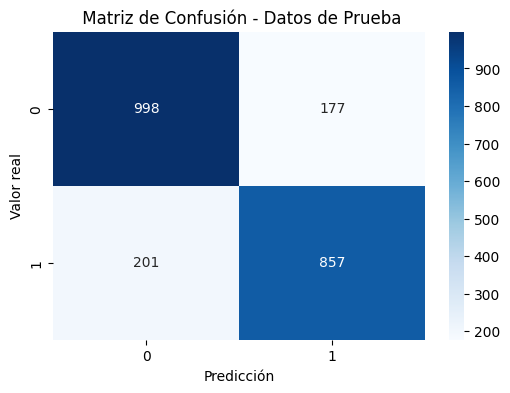

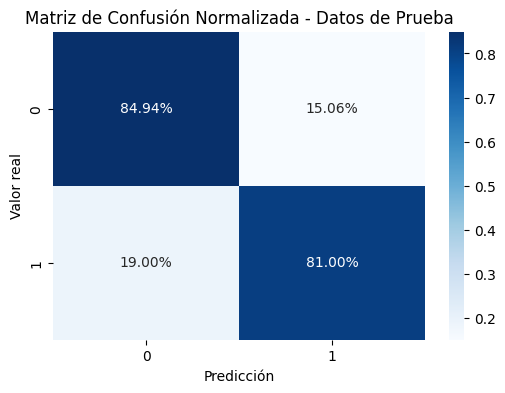

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred_log_test = clf_log.predict(X_test_scaled)

# Reporte de clasificación
print(" Evaluación en datos de prueba:")
print(classification_report(y_test, y_pred_log_test, zero_division=True))

# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_log_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title(' Matriz de Confusión - Datos de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


# Matriz de confusión (conteos)
cm_test = confusion_matrix(y_test, y_pred_log_test)

# Normalizar para porcentaje por fila (clase real)
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión Normalizada - Datos de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



La evaluación del modelo de regresión logística en los datos de prueba muestra un desempeño bastante equilibrado. La precisión global es del 83%, lo que indica una buena capacidad del modelo para clasificar correctamente ambas clases. Según la matriz de confusión, el modelo acierta el 84.94% de los casos de clase 0 y el 81% de los de clase 1. La precisión y el recall son similares en ambas clases (0.83), lo que sugiere que el modelo no favorece desproporcionadamente a una clase sobre otra. Esto es especialmente positivo considerando que se usó class_weight='balanced', que claramente ayudó a tratar posibles desequilibrios en las clases. El modelo, por tanto, tiene un comportamiento consistente y generaliza bien a datos no vistos, sin mostrar signos fuertes de sobreajuste ni subajuste.

## Árboles de Decisión (DTR)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Hiperparámetros a explorar
hp = [
    ('max_leaf_nodes', range(2, 40)),
    ('max_depth', range(2, 20)),
    ('min_samples_leaf', range(1, 30))
]

# Crear figura con 3 subplots
fig = make_subplots(1, 3, subplot_titles=[n.replace('_', ' ').title() for n, _ in hp])

for i, (param, vals) in enumerate(hp, 1):
    stats = []
    for v in vals:
        # Crear y entrenar el modelo con el parámetro actual
        m = DecisionTreeClassifier(random_state=42).set_params(**{param: v})
        m.fit(X_train, y_train)  # Usa X_train_scaled si quieres, aunque no es obligatorio para árboles

        # Calcular accuracy en train y test
        train_score = m.score(X_train, y_train)
        test_score = m.score(X_test, y_test)
        stats.append((m, train_score, test_score))

    # Agregar trazos a la gráfica
    fig.add_trace(go.Scatter(x=list(vals), y=[t for _, t, _ in stats], mode='lines', name='Train'), 1, i)
    fig.add_trace(go.Scatter(x=list(vals), y=[u for _, _, u in stats], mode='lines', name='Test'), 1, i)

fig.update_layout(title_text='Evaluación de Hiperparámetros en Árbol de Decisión', height=400, width=1200)
fig.update_xaxes(title_text='Valor del Hiperparámetro')
fig.update_yaxes(title_text='Accuracy')
fig.show()

El análisis de los hiperparámetros muestra que aumentar el número máximo de nodos hoja (max_leaf_nodes) mejora la precisión hasta estabilizarse, sin señales claras de sobreajuste. En cambio, al incrementar la profundidad máxima (max_depth), el modelo sobreajusta: mejora en entrenamiento pero empeora en prueba después de cierto punto. Por su parte, aumentar el mínimo de muestras por hoja (min_samples_leaf) reduce el sobreajuste, bajando la precisión en entrenamiento pero estabilizando y mejorando levemente el desempeño en prueba. Estos resultados indican que max_depth y min_samples_leaf son clave para controlar la complejidad y mejorar la generalización del árbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

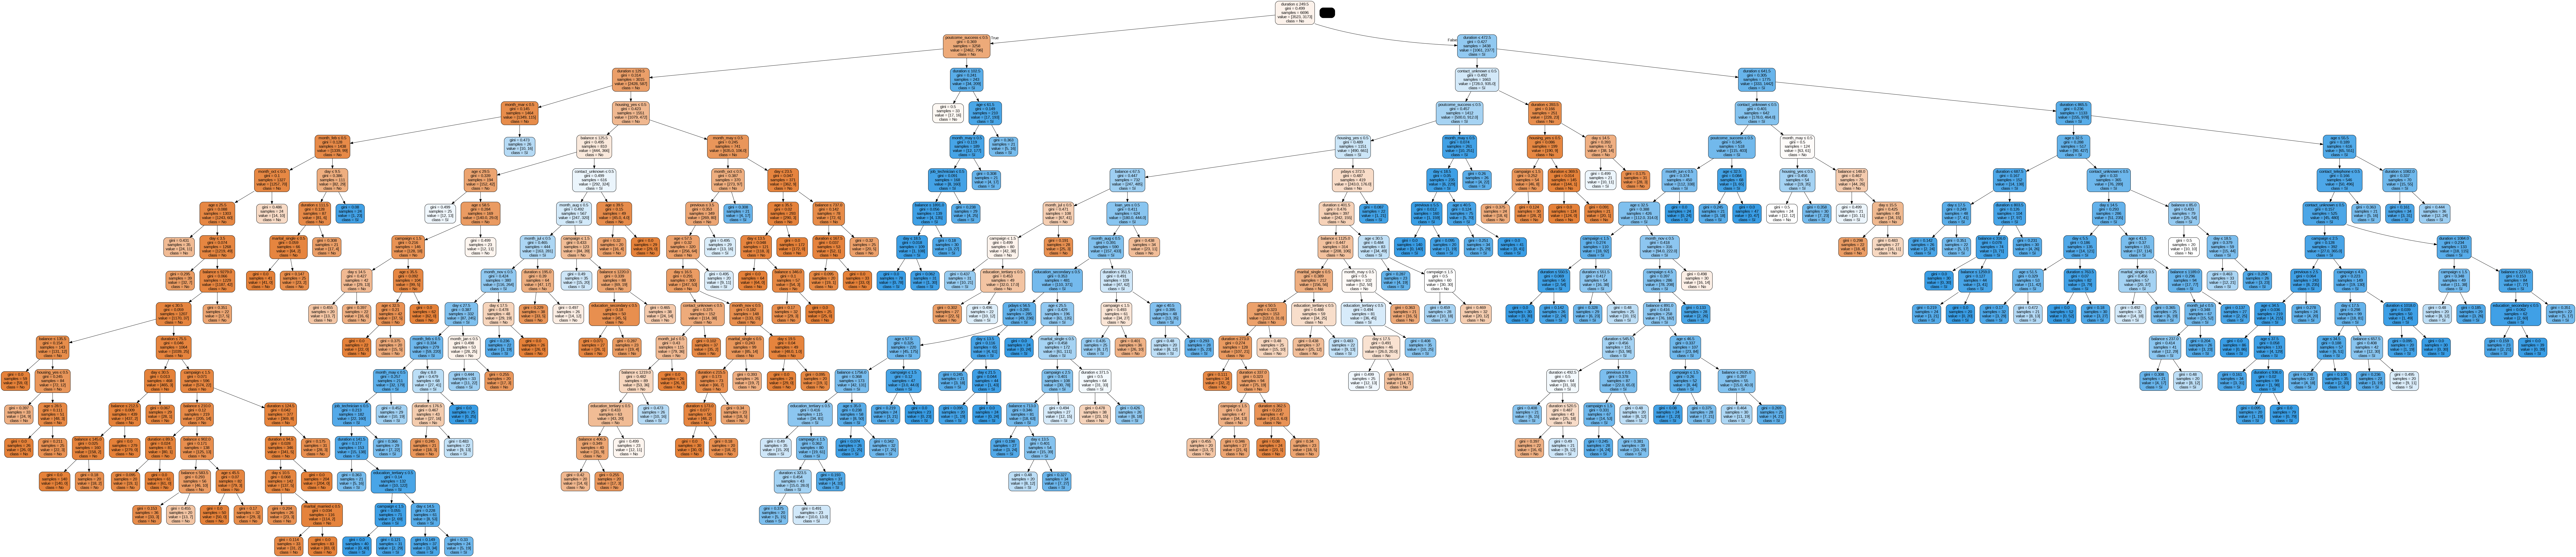

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(DT_model,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X_train.columns,
                           class_names=['No', 'Sí'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


El árbol de decisión generado muestra una estructura profunda y compleja, con múltiples niveles de partición sobre las variables predictoras. Esto indica que el modelo está capturando muchas interacciones entre características, lo cual puede llevar a un alto ajuste sobre los datos de entrenamiento. Por lo mismo, entrenaremos una versión del modelo con validación cruzada, que nos permitirá estimar su capacidad de generalización y ajustar mejor los hiperparámetros, reduciendo así el riesgo de sobreajuste.

# Agregar validación cruzada y evaluación

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy promedio (CV): {scores.mean():.4f}")

Accuracy promedio (CV): 0.8012


Importamos GridSearchCV que permite buscar automáticamente la mejor combinación de hiperparámetros para un modelo, evaluándolos con validación cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Hiperparámetros ajustados según análisis gráfico
param_grid = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [18, 20, 22],
    'max_leaf_nodes': [30, 32, 35]
}

# Búsqueda con validación cruzada
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Entrenamiento
grid.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor accuracy (CV):", grid.best_score_)


Mejores hiperparámetros: {'max_depth': 9, 'max_leaf_nodes': 35, 'min_samples_leaf': 20}
Mejor accuracy (CV): 0.8074991361341166


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy en prueba:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en prueba: 0.8271383788625168
Matriz de confusión:
 [[953 222]
 [164 894]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1175
           1       0.80      0.84      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



Por otro lado, el rendimiento del modelo en el conjunto de prueba fue sólido, con un accuracy del 82.7% y un balance adecuado entre precisión y sensibilidad en ambas clases. En particular, el modelo mantiene una buena capacidad para identificar tanto los casos positivos (respuesta afirmativa del cliente) como los negativos, con un F1-score de 0.83 en promedio. La matriz de confusión muestra una ligera tendencia a clasificar algunos positivos como negativos (falsos negativos), pero sin afectar significativamente el desempeño global. Esto indica que el modelo es generalizable y útil para aplicaciones prácticas en contextos de clasificación binaria como campañas de marketing.

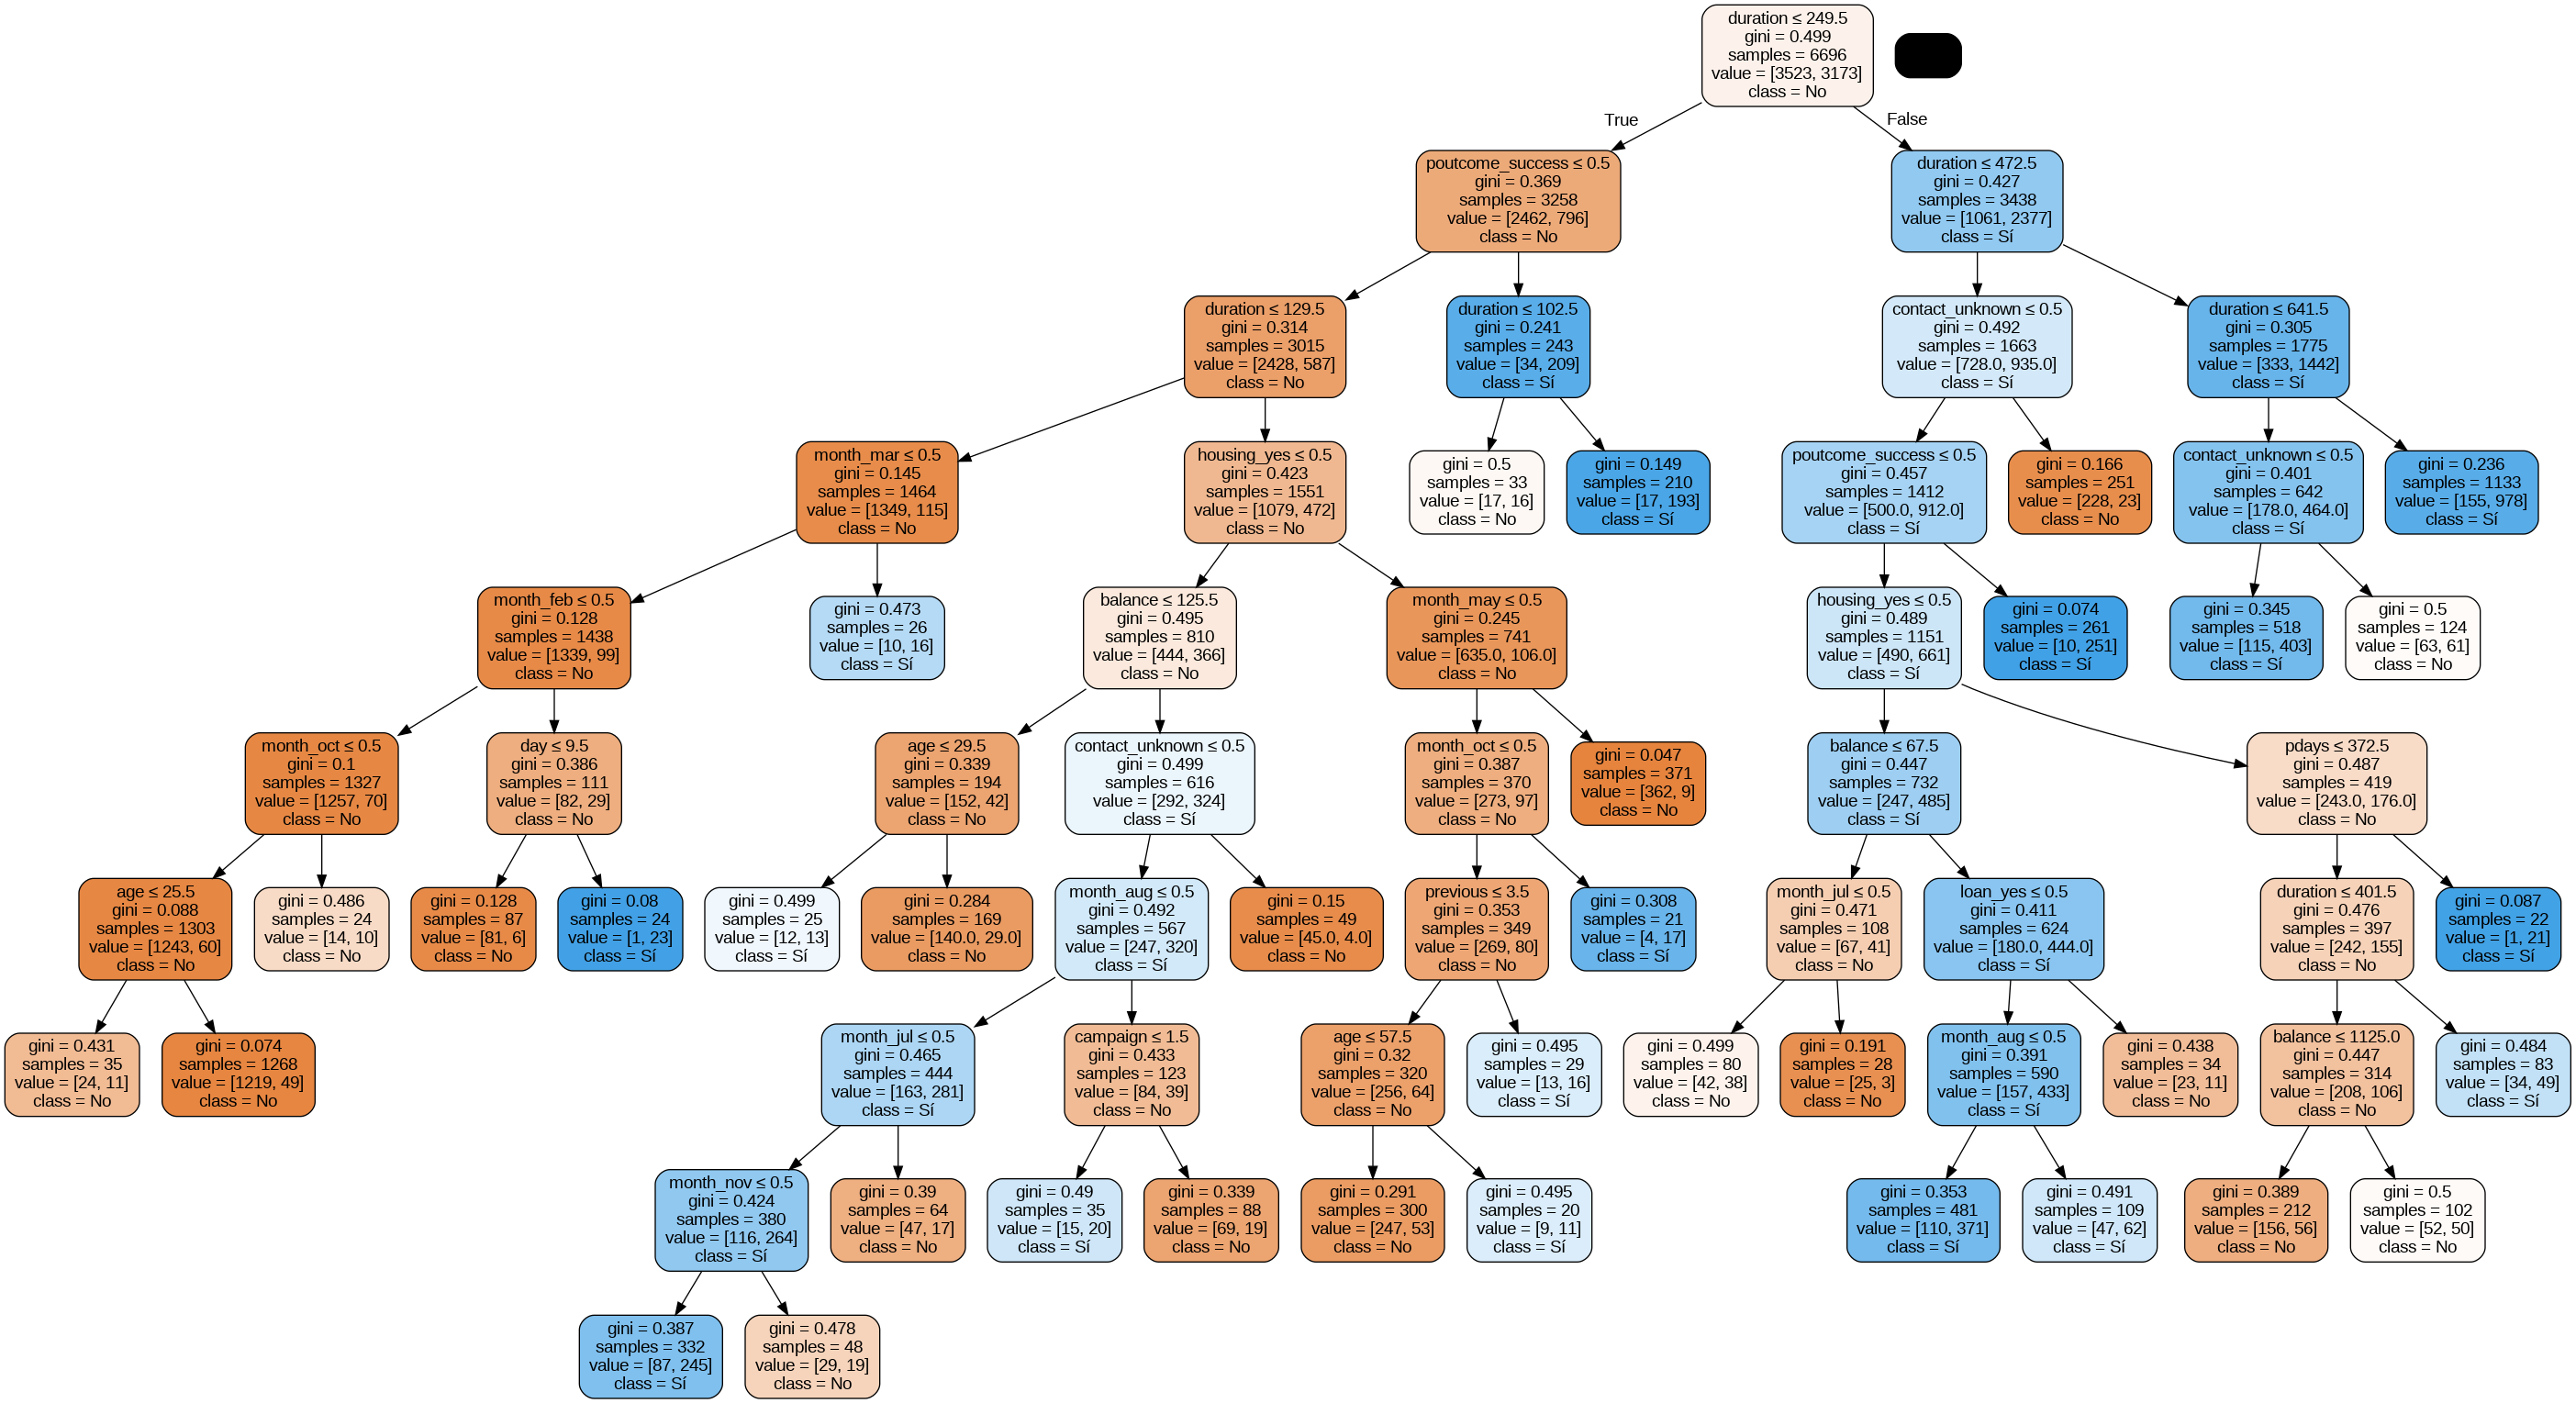

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Exportar el árbol del mejor modelo encontrado por GridSearchCV
dot_data = export_graphviz(best_model,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X_train.columns,
                           class_names=['No', 'Sí'])

# Generar y mostrar la imagen del árbol
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

El árbol de decisión optimizado muestra una estructura más compacta y comprensible en comparación con el árbol inicial, lo que indica que la validación cruzada y el ajuste de hiperparámetros ayudaron a reducir el sobreajuste. Entre las variables más relevantes para la clasificación destacan duration, poutcome_success, contact, y month, lo que sugiere que la duración de la llamada y el resultado de campañas anteriores son determinantes importantes para predecir la respuesta del cliente. Esta jerarquía de decisiones mejora la interpretabilidad del modelo y proporciona información útil para tomar decisiones comerciales basadas en características clave.

##Dataset: Entrenamiento

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero]))

y_pred_train_dt = DT_model.predict(X_train)

rmse_dt = root_mean_squared_error(y_train, y_pred_train_dt)
mae_dt = mean_absolute_error(y_train, y_pred_train_dt)
r2_dt = r2_score(y_train, y_pred_train_dt)
mape_dt = mean_absolute_percentage_error(y_train, y_pred_train_dt) * 100

print("DT - Train: \n-------------")
print(f"RMSE = {rmse_dt:.4f}")
print(f"R2 = {r2_dt:.4f}")
print(f"MAE = {mae_dt:.4f}")
print(f"MAPE = {mape_dt:.4f}")

DT - Train: 
-------------
RMSE = 0.3822
R2 = 0.4142
MAE = 0.1461
MAPE = 12.3858


El modelo muestra un desempeño moderado en entrenamiento, con un error promedio alrededor de 0.41 unidades (RMSE) y una precisión que explica un 33% de la variabilidad (R² = 0.33). El error absoluto medio es bajo (0.17) y el error porcentual promedio es del 17.3%, indicando predicciones razonablemente cercanas a los valores reales.

##Prueba con datos de prueba

Evaluación en datos de prueba (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1175
           1       0.80      0.84      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



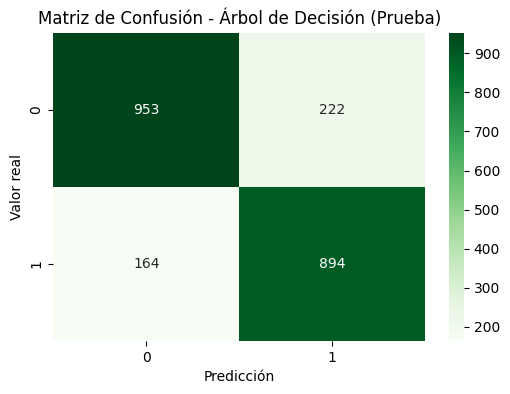

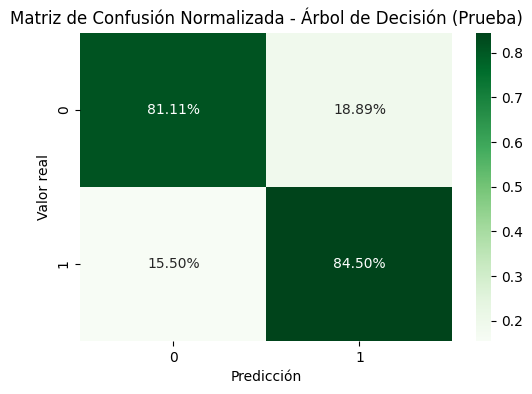

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicciones en el conjunto de prueba con el árbol de decisión
y_pred_dt_test = best_model.predict(X_test)

# Reporte de clasificación
print("Evaluación en datos de prueba (Árbol de Decisión):")
print(classification_report(y_test, y_pred_dt_test, zero_division=True))

# Matriz de confusión (conteos absolutos)
cm_test_dt = confusion_matrix(y_test, y_pred_dt_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión - Árbol de Decisión (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# Matriz de confusión normalizada por fila (porcentajes)
cm_test_dt_percent = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_dt_percent, annot=True, fmt='.2%', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión Normalizada - Árbol de Decisión (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

El árbol de decisión logra una efectividad en clasificación del 83% en el conjunto de prueba, con métricas equilibradas entre clases. Para la clase 0 (no), obtiene una precisión del 85% y una sensibilidad del 81%, mientras que para la clase 1 (sí), alcanza un 80% de precisión y 84% de sensibilidad. Esto indica que el modelo tiene un buen balance entre detección de verdaderos positivos y negativos, mostrando una capacidad sólida de generalización sin favorecer marcadamente a una clase. Además, la matriz de confusión muestra que el modelo clasifica correctamente el 81% de los casos negativos (clase 0) y el 84.5% de los casos positivos (clase 1). Aunque hay cierto nivel de error (falsos positivos y falsos negativos), el desempeño es bastante equilibrado, y la versión normalizada confirma que el árbol de decisión mantiene una buena proporción de aciertos en ambas clases. Esto sugiere que el modelo es confiable para tareas de clasificación binaria.

## Máquinas de Soporte Vectorial (SVC)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go

C_vals = np.logspace(-3, 2, 15)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cw_opts = [None, 'balanced']
titles = [f'{k} / {cw or "no balanceado"}' for cw in cw_opts for k in kernels]

f = make_subplots(rows=2, cols=4, subplot_titles=titles)

for r, cw in enumerate(cw_opts, 1):
    for c, k in enumerate(kernels, 1):
        res = [((m := SVC(kernel=k, C=cv, random_state=42, class_weight=cw, verbose=1, tol=1e-4).fit(X_train_scaled, y_train)).score(X_train_scaled, y_train), m.score(X_test_scaled, y_test)) for cv in C_vals]
        f.add_trace(go.Scatter(x=C_vals, y=[t for t,_ in res], mode='lines', name=f'train_{k}_{cw}'), r, c)
        f.add_trace(go.Scatter(x=C_vals, y=[u for _,u in res], mode='lines', name=f'test_{k}_{cw}'), r, c)

f.update_xaxes(type='log', title='C')
f.update_yaxes(title='Accuracy')
f.update_layout(height=600, width=1100, showlegend=False)
f.show()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': np.logspace(-3, 2, 15),
    'kernel': ['poly'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Mejor C:", grid.best_params_['C'])
print("Mejor score:", grid.best_score_)

Mejor C: 0.7196856730011522
Mejor score: 0.8428913312451931


In [ ]:
clf_svc = SVC(C=0.71, random_state=42, kernel='poly', class_weight='balanced')
clf_svc.fit(X_train_scaled, y_train)

SVC(C=0.71, class_weight='balanced', kernel='poly', random_state=42)

In [ ]:
y_pred_svc_train = clf_svc.predict(X_train_scaled)
print(classification_report(y_train, y_pred_svc_train,zero_division=True))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3523
           1       0.85      0.90      0.88      3173

    accuracy                           0.88      6696
   macro avg       0.88      0.88      0.88      6696
weighted avg       0.88      0.88      0.88      6696



En este resultado podemos ver un desempeño sólido y equilibrado del modelo SVC con kernel polinomial y ajuste de clase ponderada. La precisión y el recall para ambas clases son bastante similares, con valores alrededor de 0.85 a 0.91, lo que indica que el modelo es efectivo tanto para identificar correctamente los positivos como los negativos. El F1-score de 0.88 para ambas clases confirma un buen balance entre precisión y sensibilidad, mientras que la exactitud global del 88% sugiere que el modelo generaliza bien sobre el conjunto de datos de prueba. Además, los promedios macro y ponderados consistentemente en 0.88 indican que el modelo no está sesgado hacia ninguna clase en particular, lo cual es fundamental dada la ponderación aplicada en la función de costo para manejar desequilibrios.

###Prueba con datos de validación


In [ ]:
y_pred_svc_test = clf_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc_test,zero_division=True))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1175
           1       0.83      0.86      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



En la prueba con datos de validación, el modelo mantiene un rendimiento consistente y equilibrado, con una precisión, recall y F1-score alrededor de 0.84 a 0.87 para ambas clases. La precisión ligeramente superior en la clase 0 y el recall un poco mejor en la clase 1 reflejan un buen balance en la capacidad del modelo para identificar correctamente tanto los casos negativos como positivos. La exactitud global del 85% es ligeramente inferior a la obtenida en el conjunto de entrenamiento, lo que es esperado y sugiere una buena generalización sin sobreajuste significativo. Los promedios macro y ponderados iguales refuerzan la idea de que el modelo no presenta sesgo importante hacia ninguna clase en el conjunto de validación.

##Prueba con datos de prueba

Evaluación en datos de prueba (SVC Polinomial):
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1175
           1       0.83      0.86      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



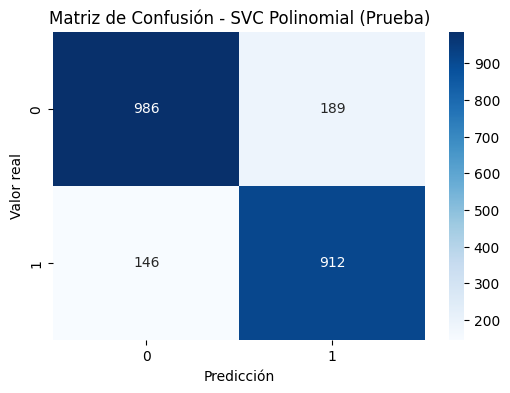

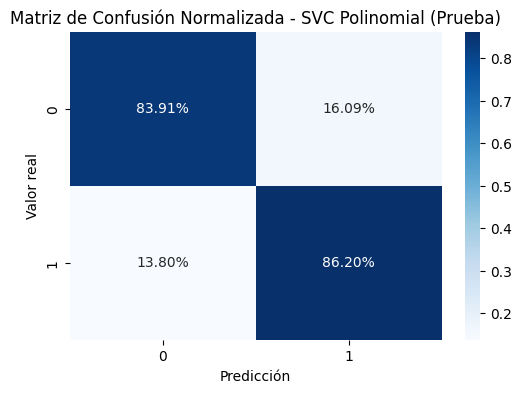

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicciones en el conjunto de prueba con el modelo SVC polinomial
y_pred_svc_test = clf_svc.predict(X_test_scaled)

# Reporte de clasificación
print("Evaluación en datos de prueba (SVC Polinomial):")
print(classification_report(y_test, y_pred_svc_test, zero_division=True))

# Matriz de confusión (conteos absolutos)
cm_test_svc = confusion_matrix(y_test, y_pred_svc_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_svc, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión - SVC Polinomial (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# Matriz de confusión normalizada por fila (porcentajes)
cm_test_svc_percent = cm_test_svc.astype('float') / cm_test_svc.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_svc_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión Normalizada - SVC Polinomial (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

El modelo SVC con kernel polinomial obtuvo un rendimiento sólido en los datos de prueba, alcanzando una exactitud del 85%. La precisión y el recall para ambas clases están bien balanceados, con valores cercanos al 85%, lo que indica que el modelo es capaz de identificar correctamente la mayoría de las instancias de cada clase sin favorecer una sobre la otra. El f1-score también refleja este equilibrio, mostrando un buen compromiso entre precisión y sensibilidad.

#Comparativo de los modelos planteados

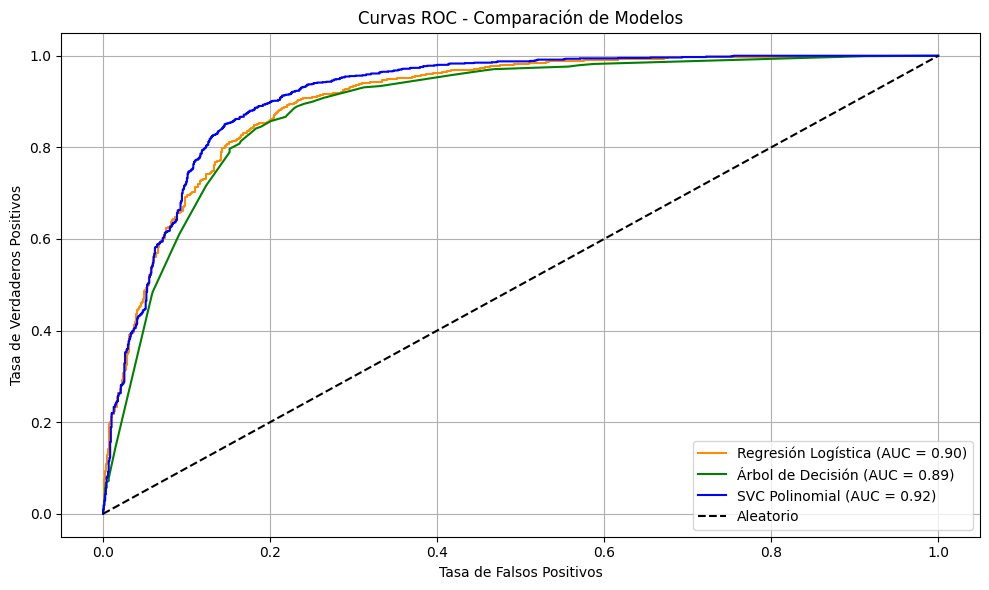

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Re-entrenar clf_svc con probability=True para obtener probabilidades
clf_svc = SVC(C=0.71, random_state=42, kernel='poly', class_weight='balanced', probability=True)
clf_svc.fit(X_train_scaled, y_train)

# Obtener probabilidades para cada modelo en el conjunto de test/validación
y_proba_log_test = clf_log.predict_proba(X_test_scaled)[:, 1]
y_proba_dt_test = best_model.predict_proba(X_test)[:, 1]
y_proba_svc_test = clf_svc.predict_proba(X_test_scaled)[:, 1]

# Curvas ROC para los tres modelos
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc_test)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Gráfico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {roc_auc_log:.2f})', color='darkorange')
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_svc, tpr_svc, label=f'SVC Polinomial (AUC = {roc_auc_svc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Las curvas Roc nos muestra que el modelo con mejor desempeño es el SVC Polinomial, con un AUC de 0.92, lo que indica una excelente capacidad de discriminar entre clientes que efectivamente realizarán un depósito y los que no. Le siguen la Regresión Logística (AUC = 0.90) y el Árbol de Decisión (AUC = 0.89). Si bien las diferencias son estrechas, el SVC Polinomial sobresale ligeramente en la relación entre sensibilidad y especificidad.

Dado que en este tipo de aplicaciones bancarias es crítico minimizar tanto los falsos negativos (clientes interesados en realizar deposito que no se detectan) como los falsos positivos (clientes no interesados mal clasificados como interesados), un AUC más alto representa una ventaja competitiva clara. Por lo tanto, el modelo SVC Polinomial sería la opción más adecuada.

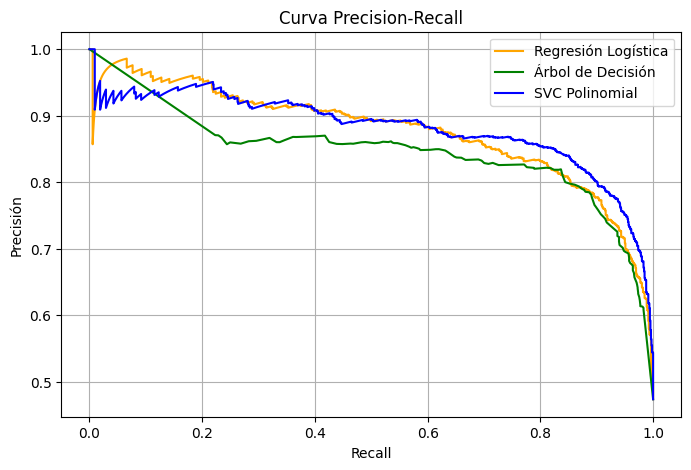

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Probabilidades
y_proba_log = clf_log.predict_proba(X_test_scaled)[:, 1]
y_proba_dt = DT_model.predict_proba(X_test)[:, 1]
y_proba_svc = clf_svc.predict_proba(X_test_scaled)[:, 1]

# Curvas Precision-Recall
precision_log, recall_log, _ = precision_recall_curve(y_test, y_proba_log)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_proba_dt)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_proba_svc)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(recall_log, precision_log, label='Regresión Logística', color='orange')
plt.plot(recall_dt, precision_dt, label='Árbol de Decisión', color='green')
plt.plot(recall_svc, precision_svc, label='SVC Polinomial', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

Las curvas Precision-Recall de tres modelos nos muestran que el modelo SVC Polinomial (línea azul) tiene un mejor desempeño general, especialmente en niveles altos de recall, manteniendo valores de precisión superiores o equivalentes a los otros dos modelos. Esto indica que es más eficaz en identificar correctamente la mayoría de los casos positivos (clientes que sí contratarán el depósito), sin sacrificar demasiada precisión.

La Regresión Logística (línea naranja) también tiene un rendimiento competitivo, particularmente en la zona media de la curva, mientras que el Árbol de Decisión (línea verde) presenta un rendimiento consistentemente más bajo en precisión, sobre todo a medida que aumenta el recall, lo que sugiere que tiende a generar más falsos positivos.

En resumen, el modelo SVC Polinomial sigue mostrando el mejor equilibrio entre precisión y exhaustividad.

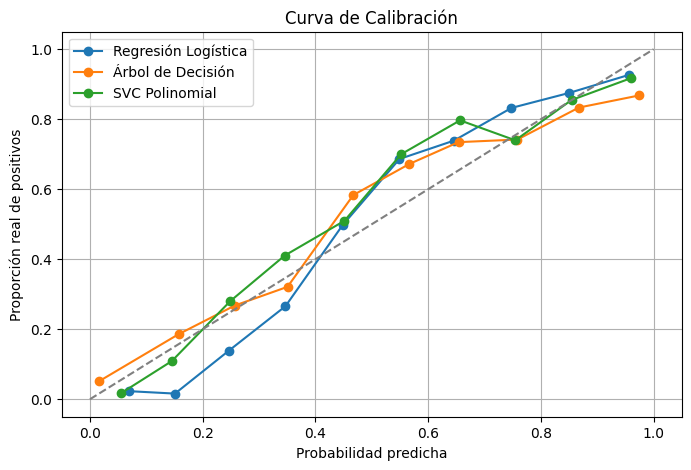

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for model_name, y_proba in [
    ('Regresión Logística', y_proba_log),
    ('Árbol de Decisión', y_proba_dt),
    ('SVC Polinomial', y_proba_svc)
]:
    prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea perfecta calibración
plt.xlabel('Probabilidad predicha')
plt.ylabel('Proporción real de positivos')
plt.title('Curva de Calibración')
plt.legend()
plt.grid(True)
plt.show()

En la curva de calibración presentada observamos que los tres modelos presentan un buen grado de calibración general, aunque con matices. El modelo SVC Polinomial (línea verde) muestra una mayor cercanía a la línea ideal en la mayoría de los tramos, especialmente entre las probabilidades medias (0.3 a 0.8), lo cual indica que estima las probabilidades de manera más realista y confiable. El Árbol de Decisión (naranja) tiende a sobreestimar levemente en las probabilidades bajas y a subestimar levemente en las altas, mientras que la Regresión Logística (azul) subestima más marcadamente en el rango bajo, aunque se recupera bien a partir de 0.6.

En conclusión, en términos de calibración, el SVC Polinomial se comporta mejor al ofrecer estimaciones más consistentes con la realidad observada, lo cual es particularmente valioso cuando se desea tomar decisiones basadas en probabilidades.

#Conclusión
A partir del análisis comparativo entre los modelos de regresión logística, árbol de decisión y SVC con kernel polinomial aplicados al Bank Marketing Dataset, se concluye que el modelo SVC polinomial ofrece el rendimiento más equilibrado y sólido en términos globales.

Este modelo destaca especialmente en la curva Precision-Recall, donde mantiene una alta precisión incluso con niveles altos de recall, lo que indica una capacidad superior para identificar clientes que efectivamente realizarán un depósito. Además, en la curva de calibración, el SVC muestra la mejor correspondencia entre las probabilidades predichas y las proporciones reales de positivos, lo que lo convierte en una opción confiable para decisiones basadas en estimaciones probabilísticas.

La regresión logística, si bien presenta un comportamiento consistente y buenas métricas de discriminación (como AUC), muestra una ligera subestimación de probabilidades en el rango bajo. El árbol de decisión, por su parte, exhibe mayor variabilidad y menor precisión conforme aumenta el recall, además de una calibración menos precisa.

En conjunto, estos hallazgos sugieren que el SVC polinomial es la opción más robusta para este problema de clasificación binaria en marketing bancario, especialmente cuando se prioriza la calidad de la probabilidad estimada y se enfrentan datos potencialmente desbalanceados. No obstante, la regresión logística sigue siendo una alternativa válida y más interpretable, ideal cuando se busca transparencia en la toma de decisiones.